In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
#设定绘图背景样式
sns.set_style('darkgrid')  
#设定图标颜色版
sns.set_palette('muted')


In [3]:
df = pd.read_csv('kc_house_data.csv',encoding='utf-8')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


查看数据集概况

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


21613条记录,21个数值型字段，日期2014年5月到2015年5月，没有缺失值.
数据解释：date: “销售日期”：2014年5月到2015年5月房屋出售时的日期
price: “销售价格”：房屋交易价格，单位为美元，是目标预测值
bed_num: “卧室数”：房屋中的卧室数目
bath_num: “浴室数”：房屋中的浴室数目
sqft_living: “房屋面积”：房屋里的生活面积
sqft_log:总占地面积
floors:楼层数
waterfront：是否可以看到海滨（0-1分类）
view  ：被浏览次数
condition  ：  总体状况如何
grade  ： 根据King County的分级制度，对住房单元进行整体评分
sqft_above  ：  除了地下室，房子的面积
sqft_basement   地下室的面积
yr_built        建造年份
yr_renovated     房子翻修的年代
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    2015年的客厅区域(暗示——一些翻新)这可能会影响也可能不会影响大面积区域
sqft_lot15      2015年总占地面积

数据预处理：删除不必要字段  id，date，lat，long，zipcode

In [5]:
df.drop(['id','date','lat','long','zipcode'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [7]:
#数值型变量的描述性统计：
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


15个自变量分为4类：
离散变量：数值：bedrooms，bathrooms，floors，view，condition，grade
0-1分类：waterfront	
连续变量：面积：sqft_living， sqft_lot，sqft_above，sqft_basement，sqft_living15，sqft_lot15
时间变量：日期：yr_built，yr_renovated	

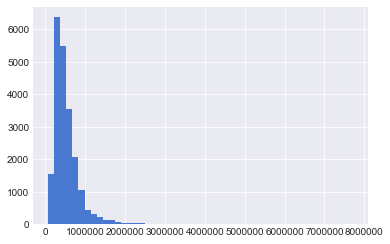

In [8]:
df.price.hist(bins =50)

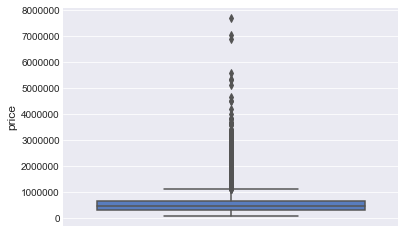

In [9]:
sns.boxplot(y = 'price',data=df)

price呈现典型的右偏分布，大部分房屋的价格都在70万元以下，符合房价的一般规律。数据的离群值基本为100万以上的数据，与上面的右偏分布相吻合。

自变量与因变量的相关性分析

绘制相关性矩阵热力图，比较各个变量之间的相关性：

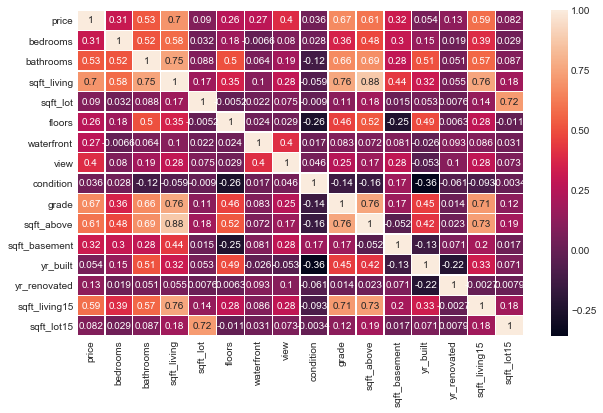

In [10]:
internal_chars =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']
corrmat = df[internal_chars].corr()  #计算相关系数
f,ax = plt.subplots(figsize=(10,6))   #设置图标尺寸大小
plt.xticks(rotation='0')
sns.heatmap(corrmat,square=False,linewidth=.5,annot=True)    #设置热力图参数




可以看到与price相关性较大的有：bathrooms,sqft_living,grade,sqft_above,sqft_living15

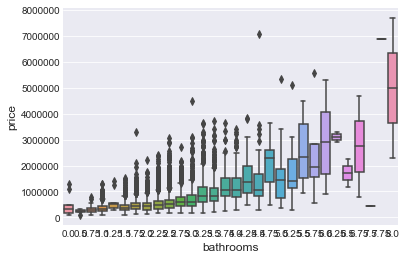

In [11]:
sns.boxplot(x='bathrooms',y='price',data=df)   #绘制分组箱线图

根据箱线图，浴室数目越多，价格越高

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


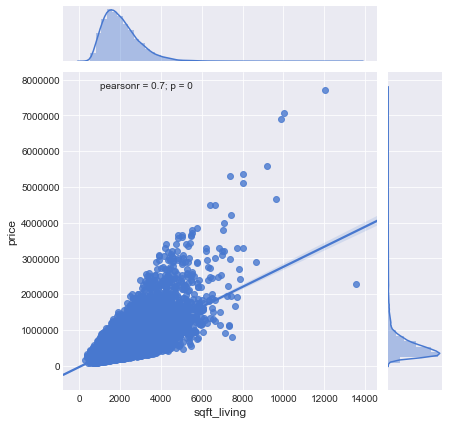

In [12]:
2
sns.jointplot('sqft_living','price',data=df,kind='reg')   #绘制散点图

房屋面积和房价呈现一定的线性关系，且房屋面积近似服从正态分布。

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


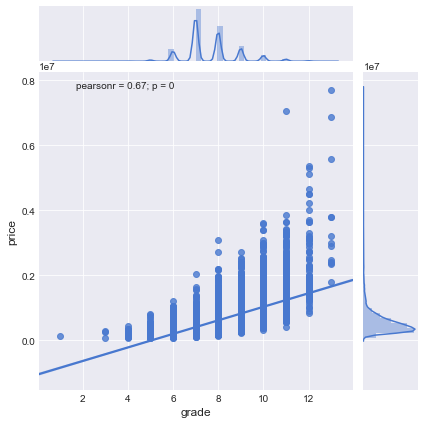

In [13]:
sns.jointplot('grade','price',data =df,kind='reg')

因为得分为离散型变量，绘制出的散点图很像分类点线图了，两者也存在线性关系。

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


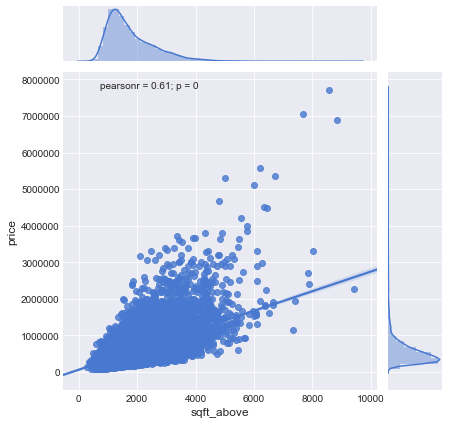

In [14]:
sns.jointplot('sqft_above','price',data =df,kind='reg')

建筑面积和房价的关系类似上述的房屋价格，不过相关系数稍低一点

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


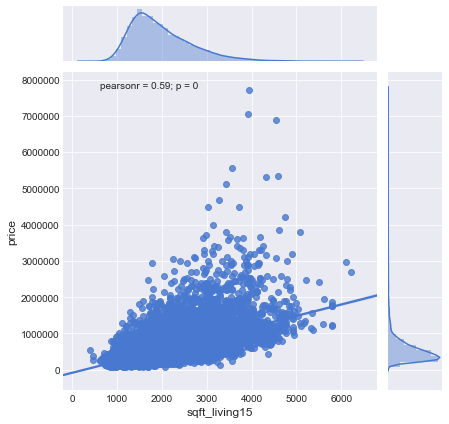

In [15]:
sns.jointplot('sqft_living15','price',data =df,kind='reg')

2015年建筑面积和房价的关系类似上述的房屋价格，不过相关系数更低

特征筛选：

虽然之前在探索性分析中我们已经筛选出了4个自变量，但这只是人工地进行筛选，并不科学，所以我们要用“机器学习”中的特征选择方法继续筛选。通常，可以从两个方面来选择特征：

特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
特征与因变量的相关性：这点比较显见，与因变量相关性高的特征，应当优选选择。
特征选择的方法有很多，例如：

Filter 法：方差选择，相关系数选择，卡方检验，互信息法

Wrapper 法：递归特征消除法

Embedded法：基于惩罚项的选择，基于树模型的选择


1）使用 Wrapper 法筛选：

----递归消除特征法是使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。使用feature_selection库的RFE类来选择特征。

In [16]:
x =df
x=np.array(x)  #建立自变量二维数组
x

array([[2.21900e+05, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.34000e+03, 5.65000e+03],
       [5.38000e+05, 3.00000e+00, 2.25000e+00, ..., 1.99100e+03,
        1.69000e+03, 7.63900e+03],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.72000e+03, 8.06200e+03],
       ...,
       [4.02101e+05, 2.00000e+00, 7.50000e-01, ..., 0.00000e+00,
        1.02000e+03, 2.00700e+03],
       [4.00000e+05, 3.00000e+00, 2.50000e+00, ..., 0.00000e+00,
        1.41000e+03, 1.28700e+03],
       [3.25000e+05, 2.00000e+00, 7.50000e-01, ..., 0.00000e+00,
        1.02000e+03, 1.35700e+03]])

In [17]:
y = df[['price']]
y = np.array(y)  #建立因变量二维数组
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [18]:
from sklearn.linear_model import LinearRegression     # 导入基模型
from sklearn.feature_selection import RFE             # 导入RFE模块
model1 = LinearRegression()                           # 建立一个线性模型
rfe = RFE(model1,5)                                   # 进行多轮训练，设置筛选特征数目为5个
rfe = rfe.fit(x,y)                                    # 模型的拟合训练
print(rfe.support_)                                   # 输出特征的选择结果
print(rfe.ranking_)                                   # 特征的选择排名

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True False  True False False  True  True False  True False False False
 False False False False]
[ 1  3  1  5 11  1  1  4  1  2  8  7  6 10  9 12]


输出结果中'True'为选择的特征变量，排名也是第1位，可以得出用Wrapper法筛选的特征为：bedrooms,sqft_living,waterfront,view,grade这5个。

利用“交叉检验”的方法看如果这四个变量进入模型，模型的性能怎么样。

---交叉检验的概念是将数据分成训练集和测试集，取一部分训练集数据得到回归方程，并在测试集中进行检验，观察正确度，以此来评判模型的好坏。

In [19]:
from sklearn.model_selection import cross_val_score               #导入交叉检验的模块
x_test1 = df[['bedrooms','sqft_living','waterfront','view','grade']]
x_test1 = np.array(x_test1)                                       # 建立自变量的二维数组
y_test1 = df[['price']]
y_test1 = np.array(y_test1)                                       # 建立因变量的二维数组
model2 = LinearRegression()                                       # 建立线性模型
model2.fit(x_test1,y_test1)                                        # 模型的拟合训练
scores = -cross_val_score(model2, x_test1, y_test1, cv=5, scoring= 'neg_mean_absolute_error')
print(np.mean(scores))                                            # 将数据集分为5份，分别进行5次回归，返回得分

155262.9475883078


输出：155262.9475883078，得分越高，说明模型的误差越大，所以输出的结果越小越好。

下面用Filter法进行特征选择：

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)                 # 用f_classif方法，设定数目为4
a=selector.fit(x,y)
print(np.array(a.scores_),'\n',a.get_support())        #  输出得分及选择的结果

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[       inf 1.67935749 3.55884526 7.34719797 0.84015669 1.58550913
 2.69419077 2.43940853 1.06752736 6.92633575 5.02580875 1.9017676
 1.25184993 1.26566703 5.17674945 0.76159332] 
 [ True False False  True False False False False False  True  True False
 False False  True False]


E:\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


得出用Filter法筛选的特征为：['bedrooms','sqft_lot','sqft_above','sqft_basement','sqft_living15']5个，发现这个结果与我们用人工筛选的结果一样，我们再看看交叉检验结果如何：

In [21]:
x_test2 = df[['bedrooms','sqft_lot','sqft_above','sqft_basement','sqft_living15']]
x_test2 = np.array(x_test2)
y_test2 = df[['price']]
y_test2 = np.array(y_test2)
model3 = LinearRegression()
model3.fit(x_test2,y_test2)
scores = -cross_val_score(model3, x_test2, y_test2, cv=5, scoring= 'neg_mean_absolute_error')
print(np.mean(scores))

169191.95245875785


输出：169191.95245875785，比用Filter法的结果小，说明用Wrapper法筛选的效果更好。
选择bedrooms，sqft_lot，sqft_above,sqft_basement,sqft_living15这5个变量放入模型

建立多元回归模型

In [22]:
from sklearn.linear_model import LinearRegression
x = df[['bedrooms','sqft_lot','sqft_above','sqft_basement','sqft_living15']]
x = np.array(x)
y = df[['price']]
y = np.array(y)
model = LinearRegression()
model.fit(x,y)
a = model.intercept_  # a为回归方程的截距项
b = model.coef_       # b为回归方程的回归系数
print('y = {} + {} * X'.format(a,b))

y = [28776.13569755] + [[-5.68785349e+04 -3.68100294e-01  2.69383589e+02  3.10245927e+02
   6.86610704e+01]] * X


设'bedrooms','sqft_lot','sqft_above','sqft_basement','sqft_living15'分别为x1,x2,x3,x4,x5
所得到的方程为：y = -56879*x1 - 0.37*x2 +269*x3 + 310*x4 +28776

In [23]:
df['price_pre'] = df.apply(lambda x:x.bedrooms*-56879 - x.sqft_lot*0.37 + x.sqft_above*269+ x.sqft_basement*310 +28776,axis=1)
df_select = df[['price','price_pre']]
df_select.head()

,price,price_pre
0,221900.0,173468.50
1,538000.0,563189.46
2,180000.0,118448.00
3,604000.0,363960.00
4,510000.0,307069.40


前三条误差可以接受，后两条误差较大

导入测试集数据，开始预测

In [24]:
test = pd.read_csv('kc_house_data _test.csv',encoding='utf-8')
test['price_predice'] = test.apply(lambda x:x.bedrooms*-56879 - x.sqft_lot*0.37 + x.sqft_above*269+ x.sqft_basement*310 +28776,axis=1)
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_predice
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,173468.50
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,563189.46
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,118448.00
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,363960.00
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,307069.40


In [25]:
print("草泥马")

草泥马
